## Scales and color



We’ll finish this section by going into a bit more details about how to customize the scales and colors for ggplot objects, including more on scales and themes.

There are a number of different scale functions that allow you to customize the scales of ggplot objects. Because color is often mapped to an aesthetic, you can adjust colors in many ggplot objects using scales, as well (the exception is if you are using a constant color for an element). The functions from the scale family follow the following convention:



In [ ]:
## Generic code
scale_[aesthetic]_[vector type]


For example, to adjust the x-axis scale for a continuous variable, you’d use scale_x_continuous. You can use a scale function to change a variety of elements of an axis, including the axis label (which you could also change with xlab or ylab) as well as position and labeling of breaks. For aesthetics other than x and y, the “axis” will typically be the plot legend for that aesthetic, so these scale functions can be used to set the name, breaks, labels, and colors of plot legends.

For example, here is a plot of Time versus Passes for the World Cup 2010 data, with the number of shots taken shown by size and position shown by color, using the default scales for each aesthetic:




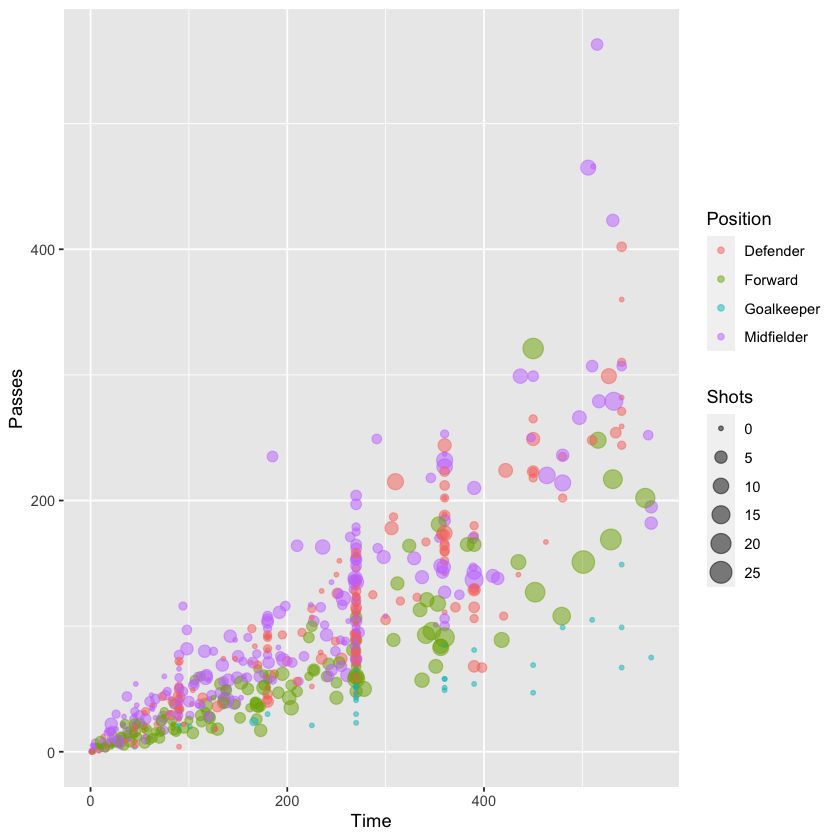

In [37]:
ggplot(worldcup, aes(x = Time, y = Passes, color = Position, size = Shots)) + 
  geom_point(alpha = 0.5)

You may want to customize the x-axis for this plot, changing the scale to show breaks every 90 minutes (the approximate length of each game). Further, you may want to give that axis a different axis title. Because you want to change the x axis and the aesthetic mapping is continuous (this aesthetic is mapped to the “Time” column of the data, which is numeric), you can make this change using scale_x_continuous:



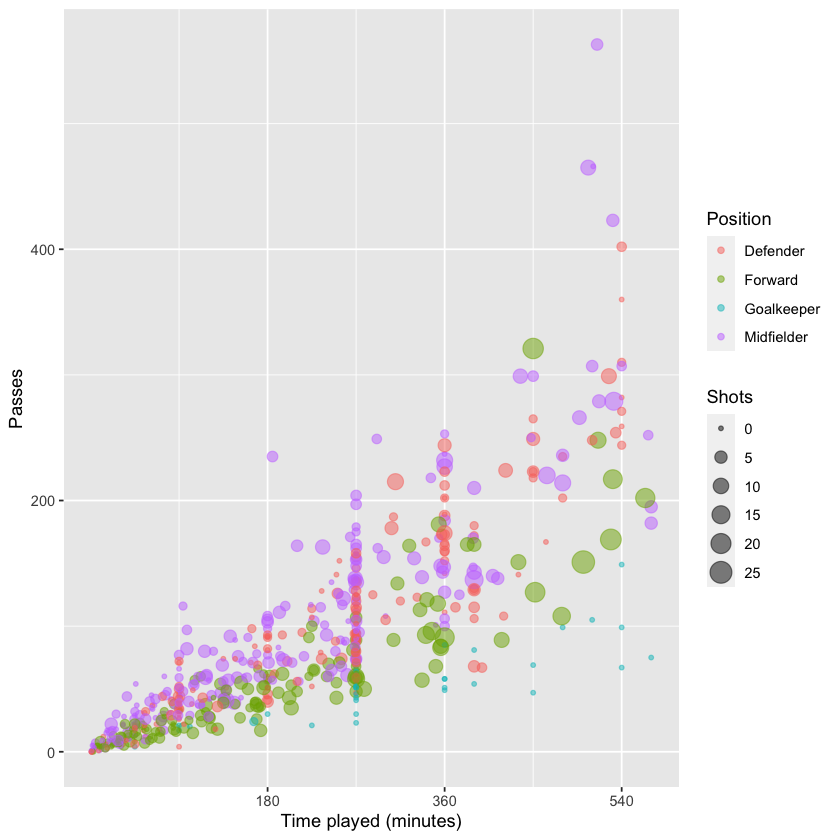

In [38]:
ggplot(worldcup, aes(x = Time, y = Passes, color = Position, size = Shots)) + 
  geom_point(alpha = 0.5) + 
  scale_x_continuous(name = "Time played (minutes)", 
                     breaks = 90 * c(2, 4, 6),
                     minor_breaks = 90 * c(1, 3, 5))

You may also want to change the legend for “Shots” to have the title “Shots on goal” and to only show the sizes for 0, 10, or 20 shots. The data on shots is mapped to the size aesthetic, and the data is continuous, so you can change that legend using scale_size_continuous:



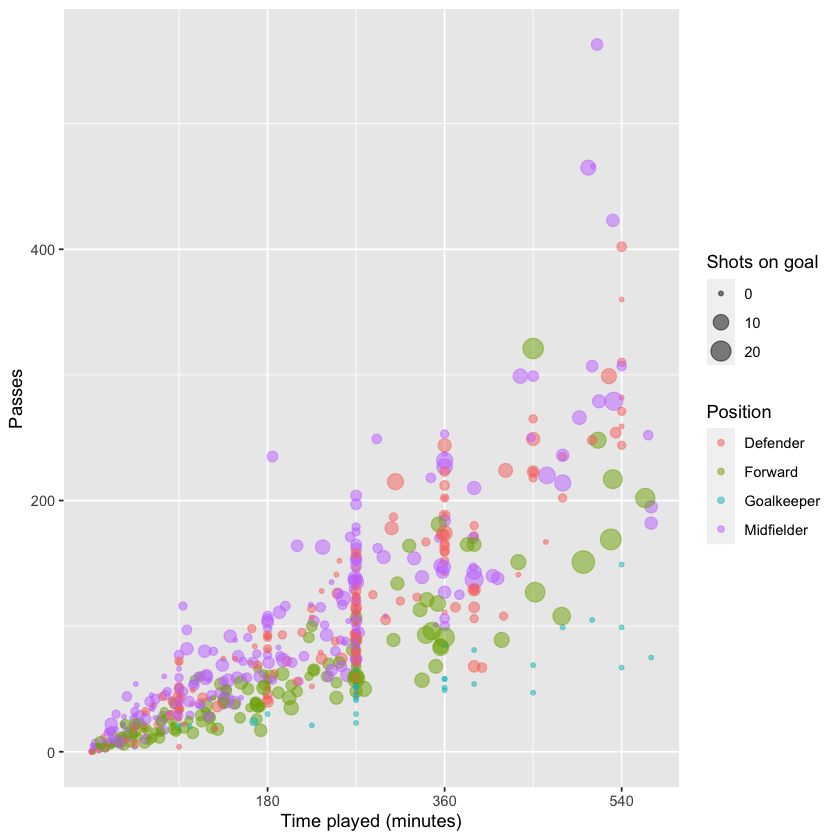

In [39]:
ggplot(worldcup, aes(x = Time, y = Passes, color = Position, size = Shots)) + 
  geom_point(alpha = 0.5) + 
  scale_x_continuous(name = "Time played (minutes)", 
                     breaks = 90 * c(2, 4, 6),
                     minor_breaks = 90 * c(1, 3, 5)) + 
  scale_size_continuous(name = "Shots on goal",
                        breaks = c(0, 10, 20))

Legends for color and fill can be manipulated in a somewhat similar way, which we explain in more detail later in this subsection.

The scale functions allow a number of different parameters. Some you may find helpful are:

Parameter	Description
name	Label or legend name
breaks	Vector of break points
minor_breaks	Vector of minor break points
labels	Labels to use for each break
limits	Limits to the range of the axis

For are mapping data that is in a date format, you can use date-specific scale functions like scale_x_date and scale_x_datetime. For example, here’s a plot of deaths in Chicago in July 1995 using default values for the x-axis:



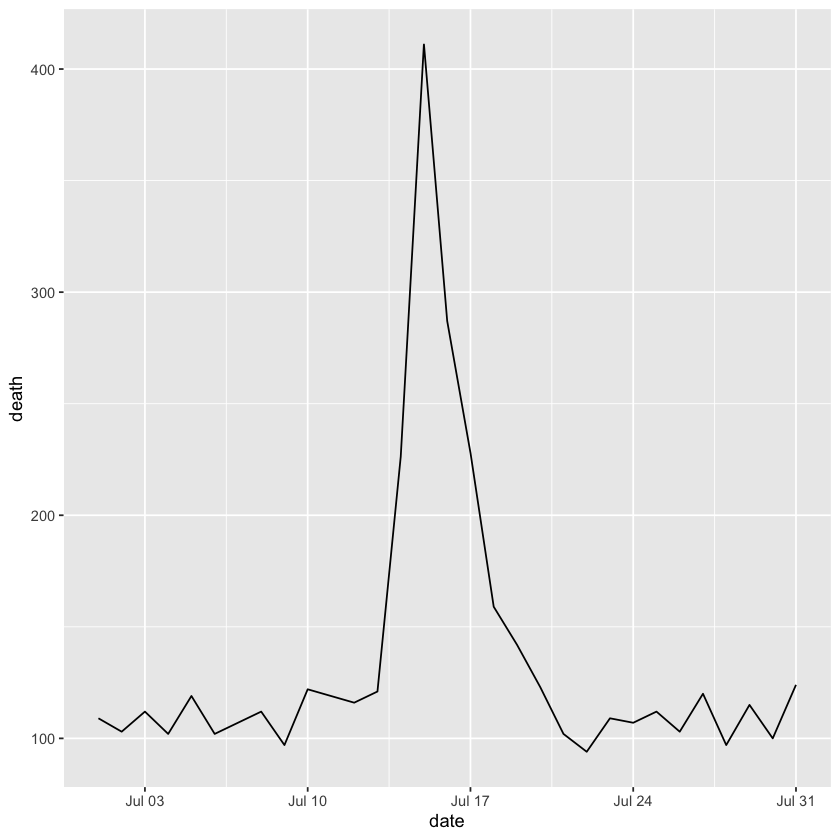

In [40]:
ggplot(chic_july, aes(x = date, y = death)) + 
  geom_line() 




These date-specific scale functions allow you to change the formatting of the date (with the date_labels parameter), as well as do some of the tasks you would do with a non-date scale function, like change the name of the axis:



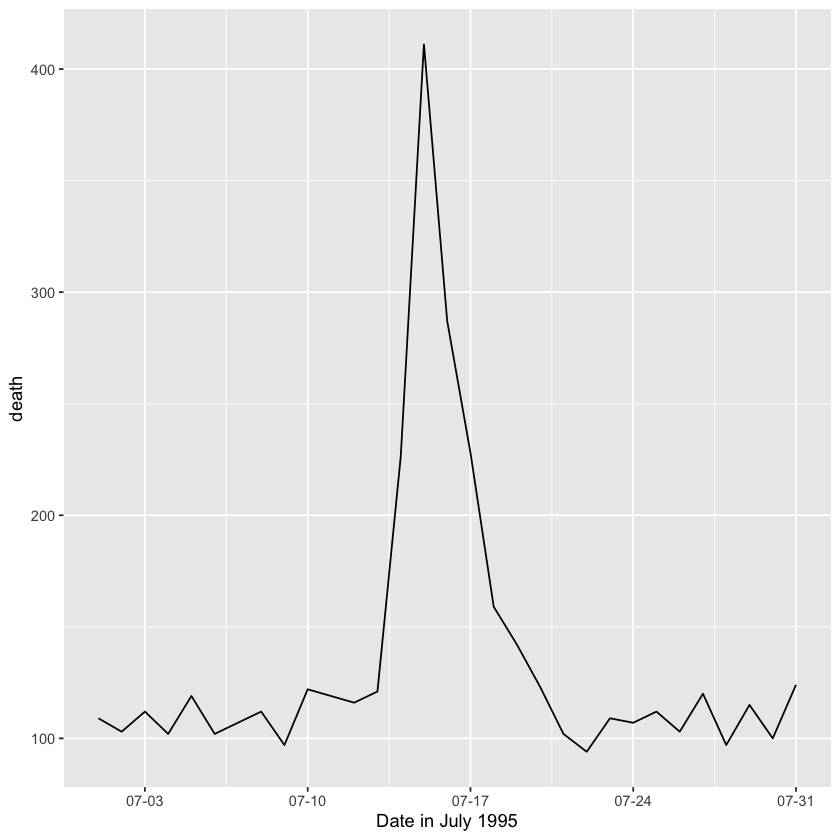

In [41]:
ggplot(chic_july, aes(x = date, y = death)) + 
  geom_line() + 
  scale_x_date(name = "Date in July 1995",
               date_labels = "%m-%d")




You can also use the scale functions to transform an axis. For example, to show the Chicago plot with “deaths” on a log scale, you can run:



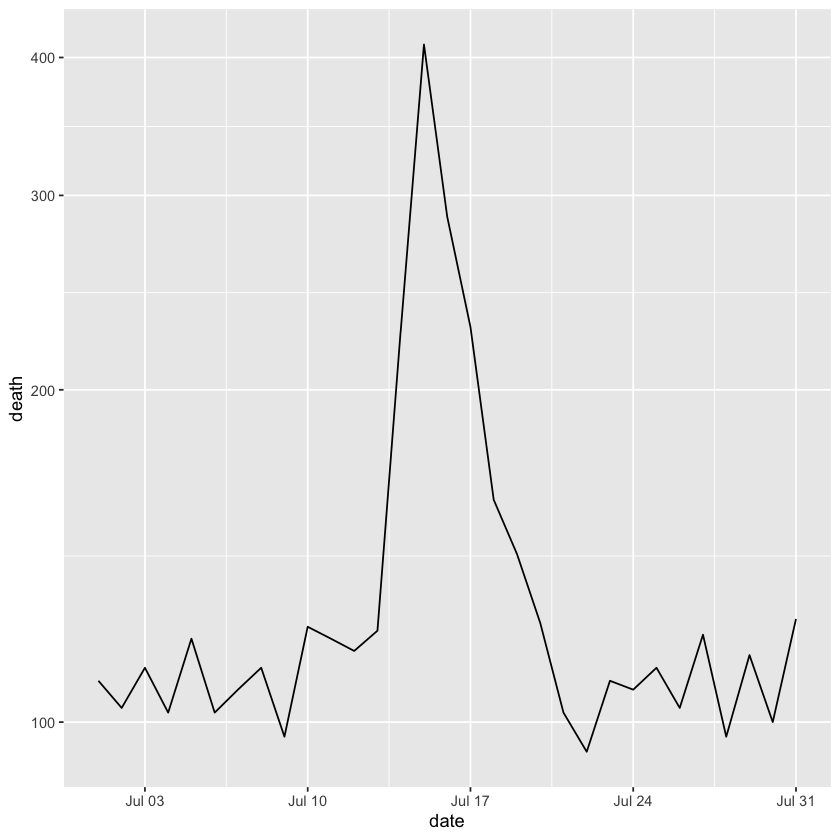

In [42]:
ggplot(chic_july, aes(x = date, y = death)) + 
  geom_line() +
  scale_y_log10(breaks = c(1:4 * 100))

For color and fill aesthetics, the conventions for naming the scale functions vary a bit, and there are more options. For example, to adjust the color scale when you’re mapping a discrete variable (i.e., categorical, like gender or animal breed) to color, one option is to use scale_color_hue, but you can also use scale_color_manual and a few other scale functions. To adjust the color scale for a continuous variable, like age, one option is the scale_color_gradient function.

There are custom scale functions you can use if you want to pull specific color palettes. One option is to use one of the “Brewer” color palettes, which you can do with functions like scale_color_brewer and scale_color_distiller.

The Brewer palettes fall into three categories: sequential, divergent, and qualitative. You should use sequential or divergent for continuous data and qualitative for categorical data. You can explore the Brewer palettes at http://colorbrewer2.org/. You can also use display.brewer.pal to show the palettes within R:



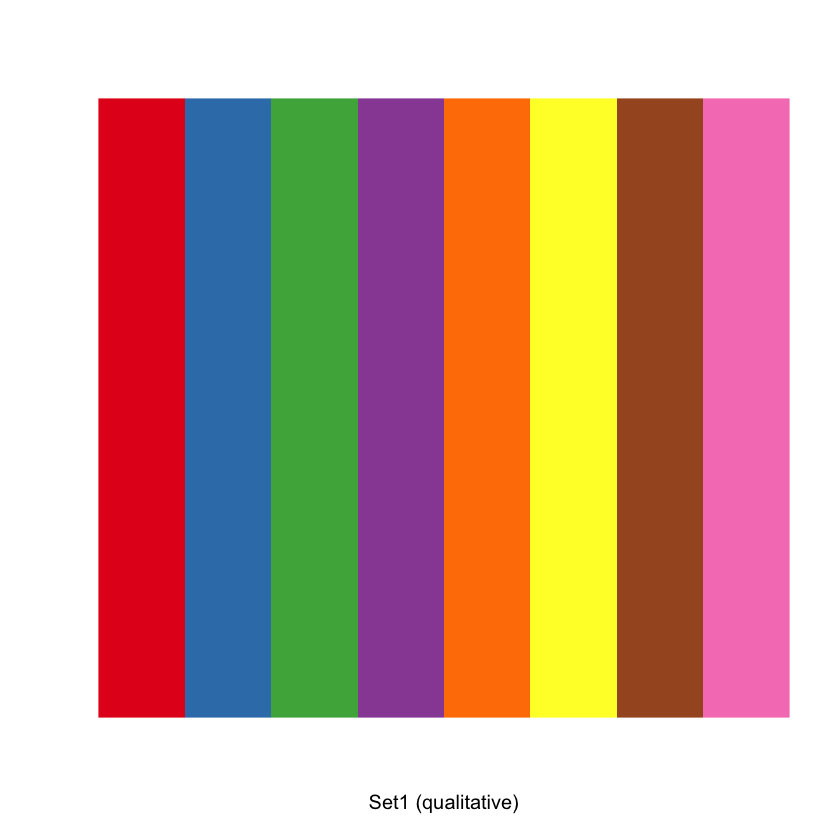

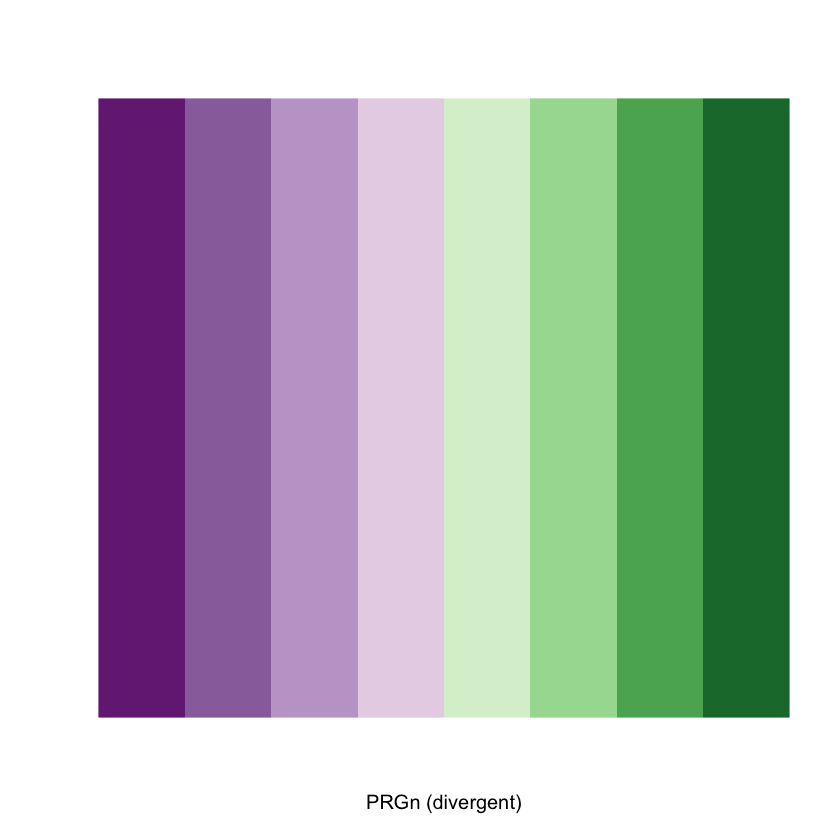

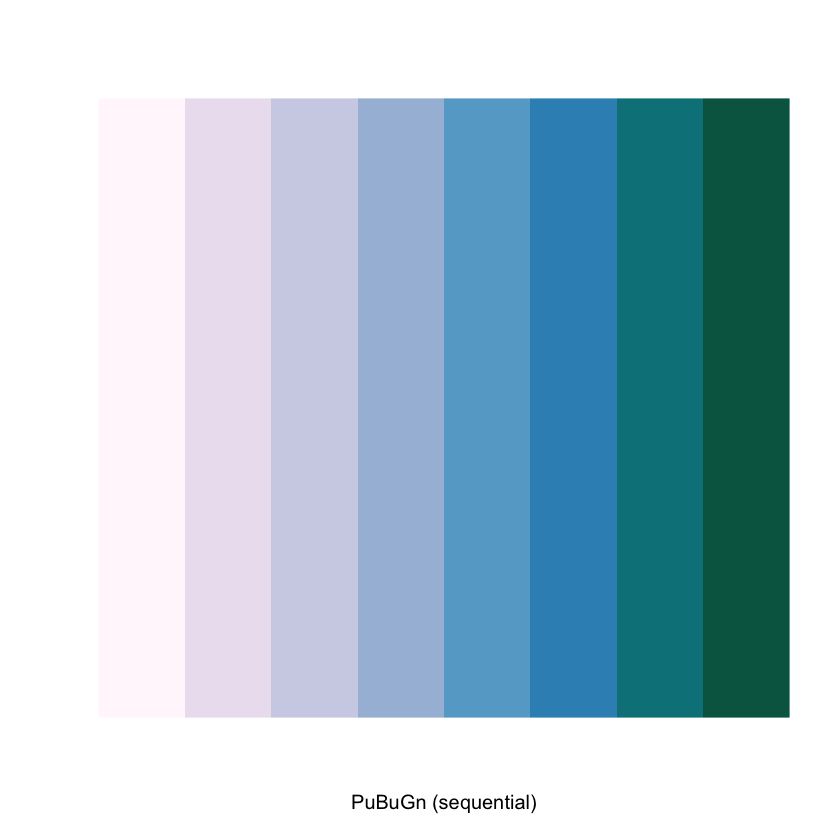

In [43]:
library(RColorBrewer)
display.brewer.pal(name = "Set1", n = 8)
display.brewer.pal(name = "PRGn", n = 8)
display.brewer.pal(name = "PuBuGn", n = 8)

Once you have picked a Brewer palette you would like to use, you can specify it with the palette argument within brewer scale function. The following plot shows examples of the same plot with three different Brewer palettes (a dark theme is also added with the pastel palette to show those points more clearly):




[`gridExtra`](https://cran.r-project.org/web/packages/gridExtra/gridExtra.pdf)


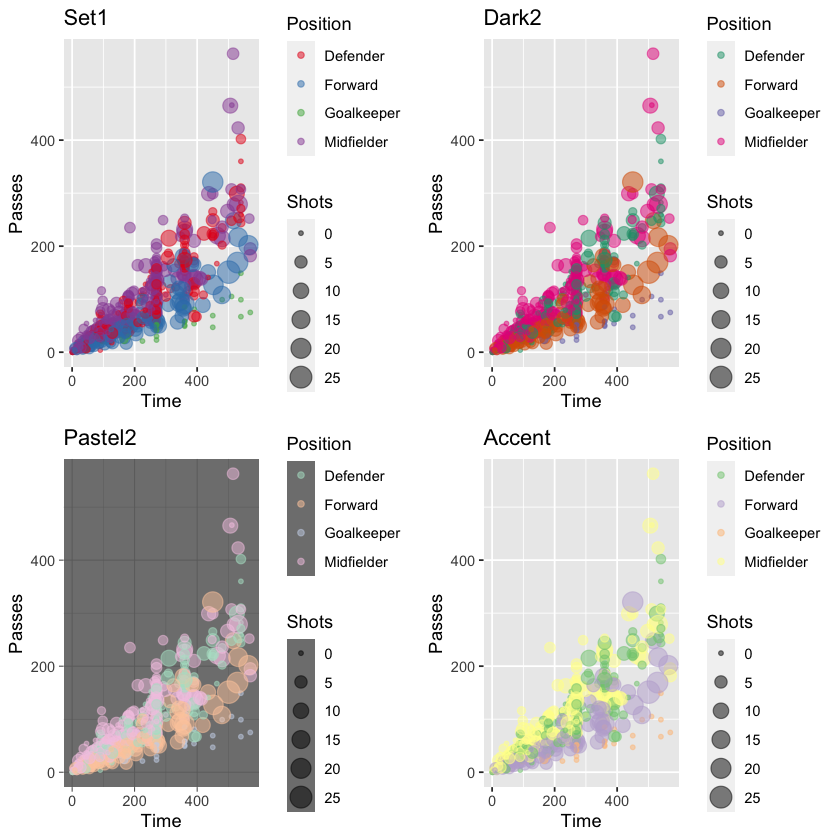

In [44]:
library(gridExtra)

wc_example <- ggplot(worldcup, aes(x = Time, y = Passes,
                     color = Position, size = Shots)) + 
  geom_point(alpha = 0.5) 

a <- wc_example + 
  scale_color_brewer(palette = "Set1") + 
  ggtitle("Set1")
b <- wc_example + 
  scale_color_brewer(palette = "Dark2") + 
  ggtitle("Dark2")
c <- wc_example + 
  scale_color_brewer(palette = "Pastel2") + 
  ggtitle("Pastel2") + 
  theme_dark()
d <- wc_example + 
  scale_color_brewer(palette = "Accent") + 
  ggtitle("Accent")
grid.arrange(a, b, c, d, ncol = 2)

You can set discrete colors manually using scale_color_manual and scale_fill_manual:



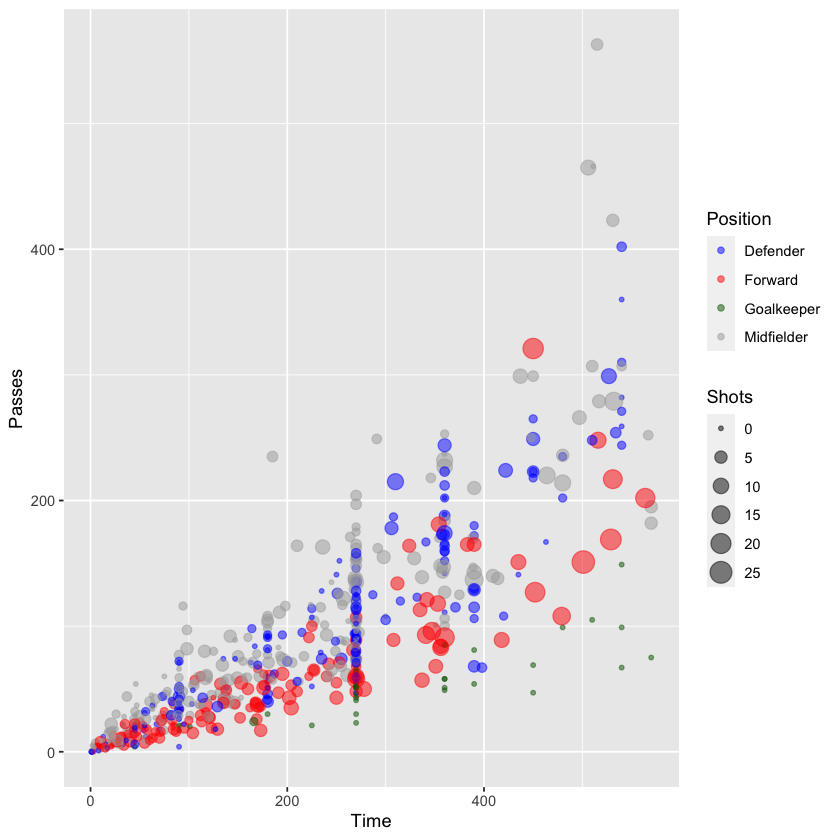

In [45]:
ggplot(worldcup, aes(x = Time, y = Passes,
                     color = Position, size = Shots)) + 
  geom_point(alpha = 0.5) + 
  scale_color_manual(values = c("blue", "red", 
                                "darkgreen", "darkgray"))

W> It is very easy to confuse the color and fill aesthetics. If you try to use a scale function for color or fill and it doesn’t seem to be doing anything, make sure you’ve picked the correct aesthetic of these two. The fill aesthetic specifies the color to use for the interior of an element. The color aesthetic specifies the color to use for the border of an element. Many elements, including lines and some shapes of points, will only take a color aesthetic. In other cases, like polygon geoms, you may find you often accidently specify a color aesthetic when you meant to specify a fill aesthetic.



Viridis color map

Some packages provide additional color palettes. For example, there is a package called viridis with four good color palettes that are gaining population in visualization. From the package’s GitHub repository:

“These four color maps are designed in such a way that they will analytically be perfectly perceptually-uniform, both in regular form and also when converted to black-and-white. They are also designed to be perceived by readers with the most common form of color blindness.”

This package includes new color scale functions, scale_color_viridis and scale_fill_viridis, which can be added to a ggplot object to use one of the four palettes. For example, to use the viridis color palette for a plot of time versus shots for the World Cup data, you can run:




Loading required package: viridisLite



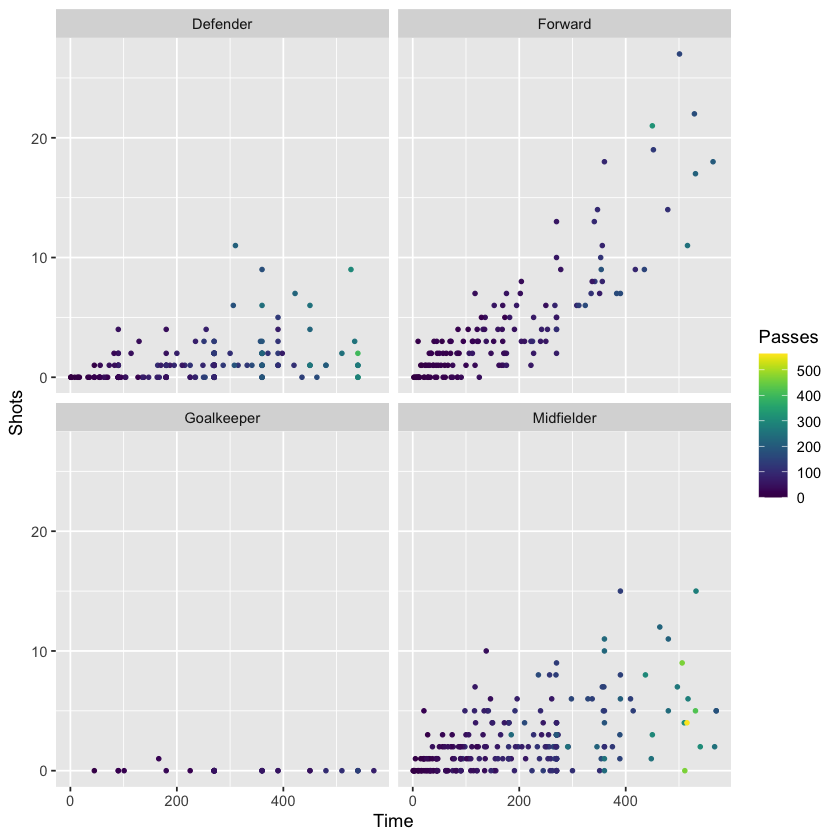

In [47]:
library(viridis)

worldcup %>%
  ggplot(aes(x = Time, y = Shots, color = Passes)) + 
  geom_point(size = 0.9) + 
  facet_wrap(~ Position) + 
  scale_color_viridis()

You can use these colors for discrete values, as well, by setting the discrete parameter in the scale_color_viridis function to TRUE:



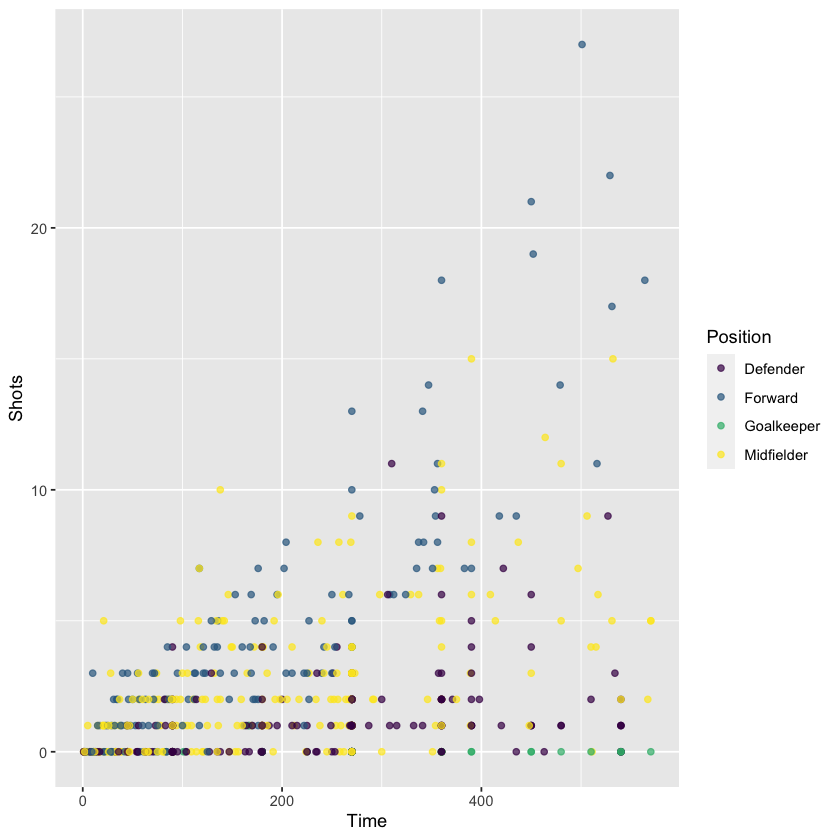

In [48]:
worldcup %>%
  ggplot(aes(x = Time, y = Shots, color = Position)) + 
  geom_point(alpha = 0.7) + 
  scale_color_viridis(discrete = TRUE)

The option argument allows you to pick between four palettes: Magma, Inferno, Plasma, and Viridis. Here are examples of each of those palettes applies to the World Cup example plot:



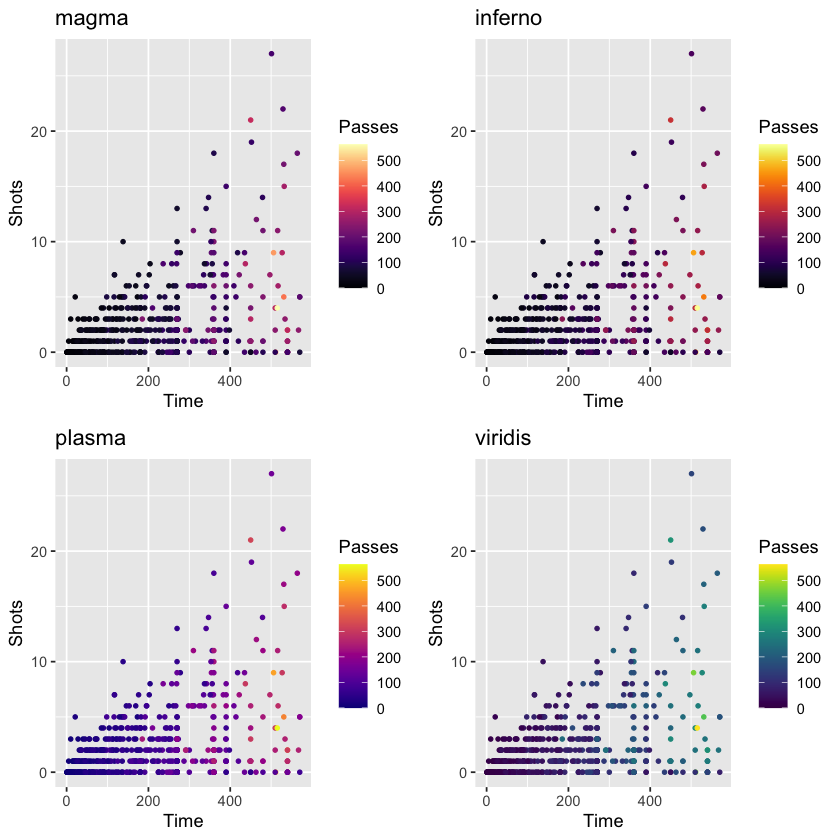

In [49]:
library(gridExtra)

worldcup_ex <- worldcup %>%
  ggplot(aes(x = Time, y = Shots, color = Passes)) + 
  geom_point(size = 0.9) 

magma_plot <- worldcup_ex + 
  scale_color_viridis(option = "A") + 
  ggtitle("magma")
inferno_plot <- worldcup_ex + 
  scale_color_viridis(option = "B") + 
  ggtitle("inferno")
plasma_plot <- worldcup_ex + 
  scale_color_viridis(option = "C") + 
  ggtitle("plasma")
viridis_plot <- worldcup_ex + 
  scale_color_viridis(option = "D") + 
  ggtitle("viridis")

grid.arrange(magma_plot, inferno_plot, plasma_plot, viridis_plot, ncol = 2)

*Notebook authored by Amy Sentis.*